# Part II - (Prosper Loans Explanatory Analysis)
## by AKINGBENI David O.

## Investigation Overview

> The goal of this explanatory analysis is to pinpoint some certain sumary for general consumption and understanding of the dataset.

## Key Insights
>- The effect of the Loan Amount on Prosper rating. At first when we explore the count of the prosperrating we discover that low risk and high risk loans have almos the same number of loans given out. On further exploration with the boxplot distribution of the LoanAmount and Prosperrating, we discover that the Most High Risk loans are lower than high risk loans as the median loan amount reduces as the risk increases. The violin plot does show the distribution better.
>- The effect of the DebttoIncome Ratio and ProsperRating depending on the loanStatus. The Debt ToIncome ratio on initial comparism when we use a facetgrid to compare the distribution between the different loan status does not show any difference to explore, however when we use a pointplot of the debt to income ratio by the different prosperrating and use the hue as the loan status, we identify a converging debt to income ratio as the risk increases which meant that as the risk increases the debt to income ratio flexibility for any loan decreases.
>- The effect of Income, Loan Amount and LoanStatus is a dynamic interaction with different contributing factors. At first the interaction between the income and loan amount does give us little information about loan activities and amount associated with different income range. As we do explore the further we discover that a range of other information affects the loan status. One of the two important refrence information is the interaction between Income, Rating and Loan Status(After subsetting the year range to not include 2013 and above) - that tells that higher income earners in high risk category(D-HR) complete their loans than defaulters. This trend is also true for AA rated loans but is silent for loans of income earners with ratings between (A - C).
> The second reference equation is the interaction between the loan amount, rating and loan status which there is a high range of loan amount borrowed for low risk loans and the difference between defaulters and those who completed their loans converge as the risk increases. This means that as the loan gets highly risky, the rating of the loan and income of the earner determines whether a loan will be defaulted or not, and the loan amount plays little role among the defaulters (They are not borrowed much anyways). As the risk reduces however i.e(HR back to AA), the amount borrowed plays a key role in whether the loan will be defaulted or not.


## Dataset Overview

>- The prosper loan dataset is a table of 130K+ entries and 81 columns that are called features. These features dynamically provide information on each loan entry and specific information such as the borrower's APR, loan status e.t.c. This dataset was among the optional datasets that Udacity provided for data vizulization project,from which I chose I chose this beacuse of my flair for the world of finance, retail and business.
>- Some Datawrangling have been done to this dataset to make it possible for the analyis performed.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
data_loan = pd.read_csv("Dataset/data_clean")

In [39]:
base_color = sb.color_palette()[0] #Make base color
#Convert ProsperRating to category
rating_list = ["AA", "A", "B", "C", "D", "E", "HR", "NC"] #Arranged in order of increasing Risk
rating_category = pd.api.types.CategoricalDtype(rating_list, ordered= True)
data_loan["ProsperRating"] = data_loan["ProsperRating"].astype(rating_category)

## Distribution  of Prosper ratings.

> Distribution of ProsperRating Distribution that shows the equal distribution on both sides and type of rating (High Risk and Low Risk Loans).
> The lowest risked loan is AA and highest risked loan is HR, and NC is No Credit rating

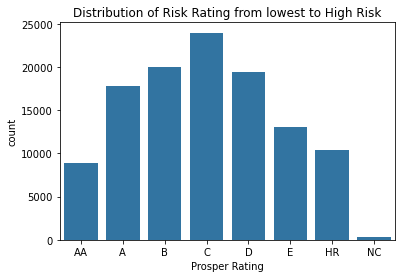

In [40]:
sb.countplot(data = data_loan, x = "ProsperRating", color= base_color)
plt.title("Distribution of Risk Rating from lowest to High Risk")
plt.xlabel("Prosper Rating");

## Distribution of Loan Amounts

> The distribution of Loan shows a sort of trimodal histogram that points that most of the income earners of the loan earn mailnly between 5K to 15K.

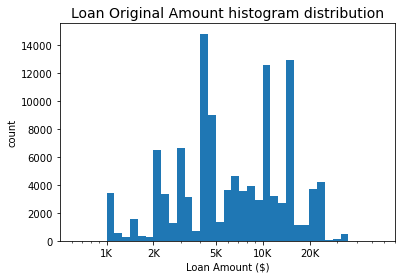

In [41]:
bin_edges = 10**(np.arange(2.8, 4.6+0.2, 0.05))
plt.hist(data = data_loan, x = "LoanOriginalAmount", bins = bin_edges)
plt.xscale("log")
ticks = [1000, 2000, 5000, 10000, 20000]
tick_labels = ["1K", "2K", "5K", "10K", "20K"]
plt.xticks(ticks, tick_labels)
plt.title("Loan Original Amount histogram distribution", fontsize = 14)
plt.ylabel("count")
plt.xlabel("Loan Amount ($)");

## Distribution of Income Earners

> The distribution of Loan shows a sort of trimodal histogram that points that most of the income earners of the loan earn mailnly between 5K to 15K.

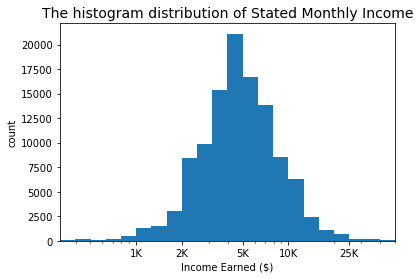

In [42]:
bins = 10**(np.arange(0, 7, 0.1))
plt.hist(data = data_loan, x = "StatedMonthlyIncome", bins = bins)
tick_count = np.array([2.5, 3.0, 3.3, 3.6, 4.0, 4.3, 4.6])
tick = [1000, 2000, 5000, 10000, 25000]
tick_label = ["1K", "2K", "5K", "10K", "25K"]
plt.xscale("log")
plt.xticks(tick, tick_label, rotation = 0)
plt.xlim(10**2.5, 10**4.7)
plt.xlabel("Income Earned ($)")
plt.ylabel("count")

plt.title("The histogram distribution of Stated Monthly Income", fontsize = 14);

## Loan Amount vs. Prosper Rating
- The median income decreases as the rating goes to the high risk end.
- The Violin Plot distribution shows us clearly and better where each rating income earners are located.

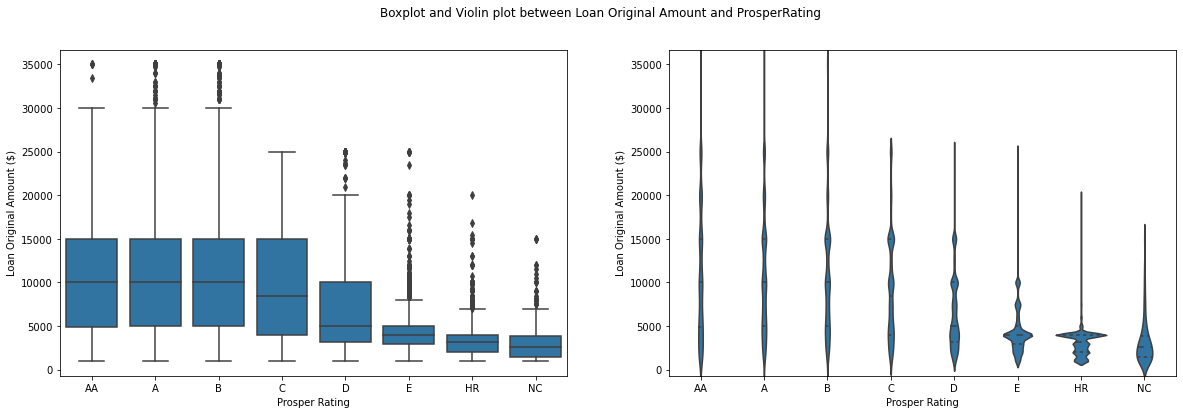

In [43]:
plt.figure(figsize = [20, 6])
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = data_loan, x = "ProsperRating", y = "LoanOriginalAmount", color = base_color)
plt.xlabel("Prosper Rating")
plt.ylabel("Loan Original Amount ($)")

plt.subplot(1, 2, 2)
sb.violinplot(data = data_loan, x = "ProsperRating", y = "LoanOriginalAmount", color = base_color, inner = "quartile")
plt.ylim(ax1.get_ylim())
plt.xlabel("Prosper Rating")
plt.ylabel("Loan Original Amount ($)")

plt.suptitle("Boxplot and Violin plot between Loan Original Amount and ProsperRating");

## Debt To Income ratio faceted by the different Prosper Rating.
>- No Observable difference at first

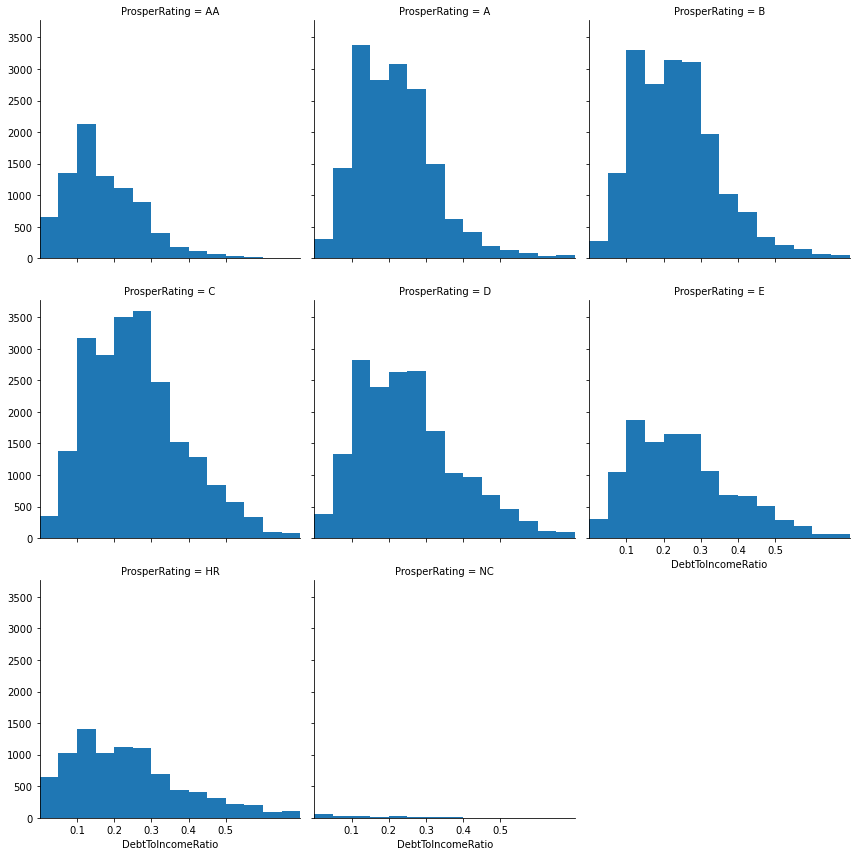

In [44]:
bins = np.arange(0, 2.2, 0.05)
tick = np.arange(0.1, 0.6, 0.1)
label = ["{:.1f}".format(v) for v in tick]
fg = sb.FacetGrid(data = data_loan, col = "ProsperRating", size=4, col_wrap= 3)
fg.map(plt.hist, "DebtToIncomeRatio", bins = bins)
fg.set(xticks = tick, xticklabels = label)
plt.xlim(0, 0.7);

## Converging `Debt to Income ratio` between the different Loan Status 
>- This shows that highly risked loans have less effect of the Debt to Income Ratio on their loan status

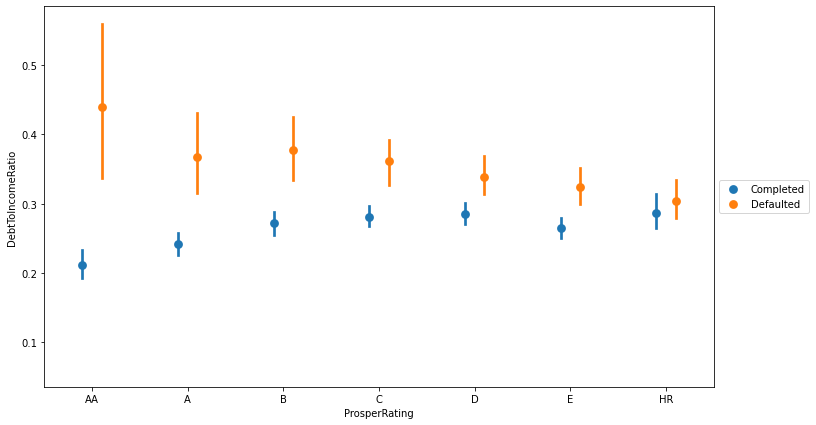

In [45]:
plt.figure(figsize = [12, 7])
data_debt = data_loan[data_loan.DebtToIncomeRatio >= 0]  #Using A debt_to_income ratio > 0
sb.pointplot(data=data_debt[data_debt.LoanStatus != "Current"], 
             x = "ProsperRating", y = "DebtToIncomeRatio", hue = "LoanStatus", dodge = 0.2, linestyles="")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

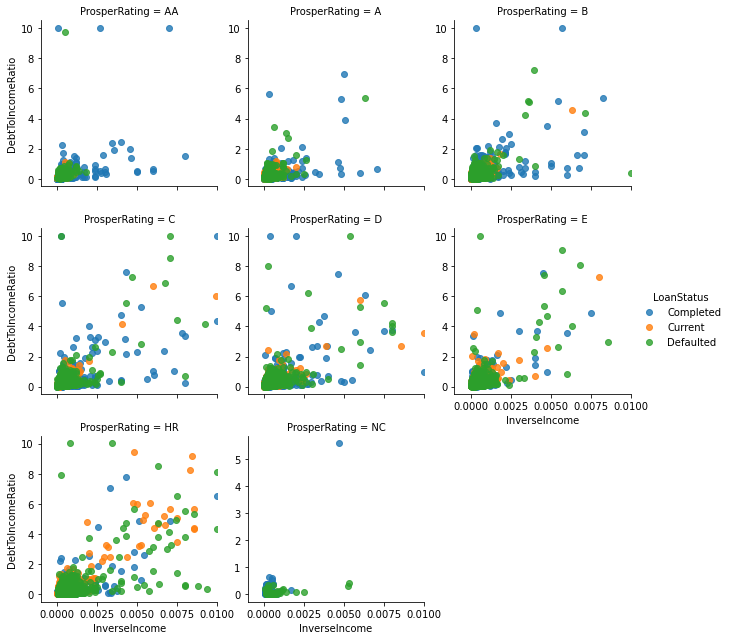

In [51]:
data = data_loan[data_loan.DebtToIncomeRatio > 0]
data["InverseIncome"] = 1/data_loan["StatedMonthlyIncome"] 

#Feature Engineer inverse income column which is directly proportional to the Debttoincome Ratio

fg = sb.FacetGrid(data = data, col = "ProsperRating", col_wrap=3, hue = "LoanStatus", sharey=False)
fg.map(plt.scatter, "InverseIncome", "DebtToIncomeRatio", alpha = 0.8)
plt.xlim(-0.001, 0.01)

fg.add_legend();

## Relationship between the Income and Loan Amount.
>- Most borrowing activities lies between 2k-10K and as the loan amount increases, the stricter it becomes as only higher income individuals have access to higher loans. 

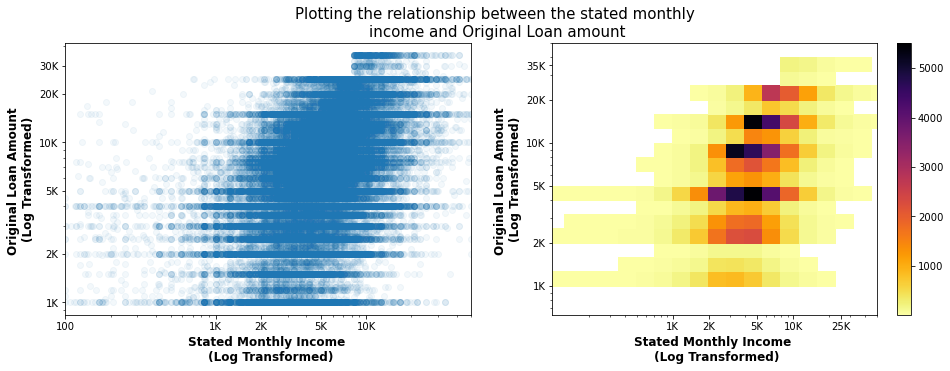

In [46]:
plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
ax1 = plt.scatter(data = data_loan, x = "StatedMonthlyIncome",  y = "LoanOriginalAmount", alpha = 1/20)
plt.xscale("log")
plt.yscale("log")
x_ticks = [10, 100, 1000, 2000, 5000, 10000]
x_labels = ["10", "100", "1K", "2K", "5K", "10K"]
y_ticks = [1000, 2000, 5000, 10000, 20000, 30000]
y_labels = ["1K", "2K", "5K", "10K", "20K", "30K"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.xlabel("Stated Monthly Income \n (Log Transformed)", weight = "bold", fontsize = 12)
plt.ylabel("Original Loan Amount \n(Log Transformed)", weight = "bold", fontsize = 12)

plt.xlim(100, 50000)

##################################################
plt.subplot(1, 2, 2)
bin_x = 10**(np.arange(0, 7, 0.15))
bin_y = 10**(np.arange(2.8, 4.6+0.2, 0.1))
plt.hist2d(data = data_loan, x = "StatedMonthlyIncome",  y = "LoanOriginalAmount", 
           cmin = 10, cmap = "inferno_r", bins = [bin_x, bin_y])
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
y_ticks = [1000, 2000, 5000, 10000, 20000, 35000]
y_labels = ["1K", "2K", "5K", "10K", "20K", "35K"]
x_tick = [1000, 2000, 5000, 10000, 25000]
x_label = ["1K", "2K", "5K", "10K", "25K"]
plt.xticks(x_tick, x_label)
plt.yticks(y_ticks, y_labels)

plt.xlabel("Stated Monthly Income \n (Log Transformed)", weight = "bold", fontsize = 12)
plt.ylabel("Original Loan Amount \n(Log Transformed)", weight = "bold", fontsize = 12)

plt.xlim(100, 50000)

plt.suptitle("Plotting the relationship between the stated monthly \nincome and Original Loan amount", fontsize = 15);

## Interaction between Income, Rating and Loan Status(After subsetting the year range to not include 2013 and above) 

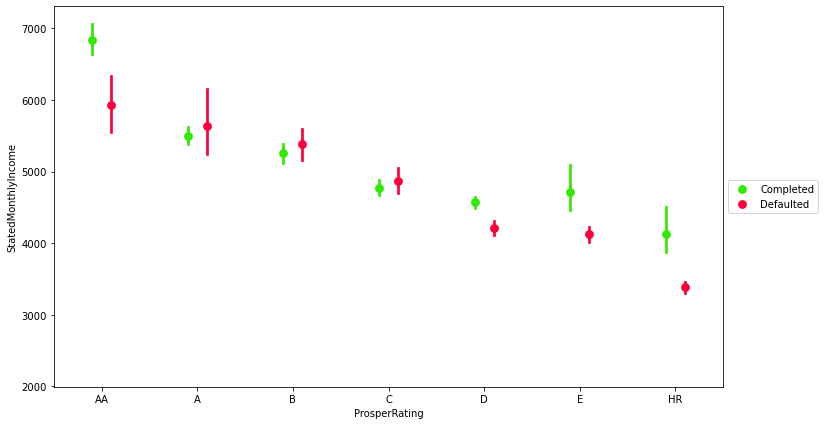

In [47]:
data_year = data_loan[data_loan.Listing_Year < 2012]

plt.figure(figsize = [12, 7])
sb.pointplot(data=data_year[data_year.LoanStatus != "Current"], 
             x = "ProsperRating", y = "StatedMonthlyIncome", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="prism")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

## Interaction between Loan Amount, Rating and Loan Status(After subsetting the year range to not include 2013 and above) 

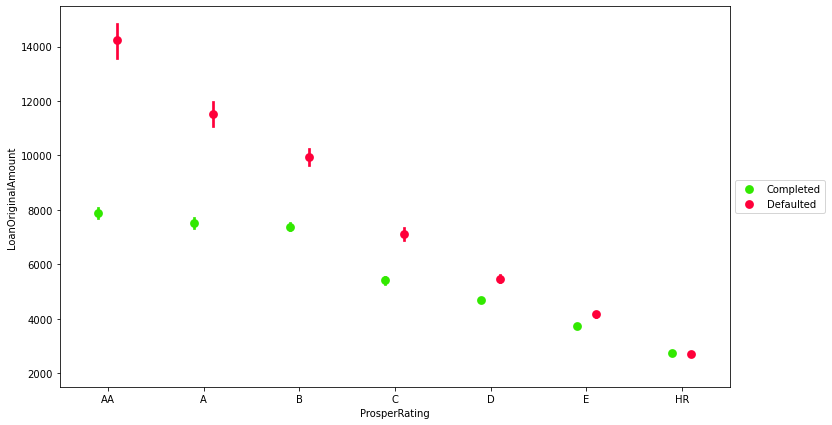

In [48]:
data_year = data_loan[data_loan.Listing_Year < 2012]

plt.figure(figsize = [12, 7])
sb.pointplot(data=data_year[data_year.LoanStatus != "Current"], 
             x = "ProsperRating", y = "LoanOriginalAmount", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="prism")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

In [53]:
!jupyter nbconvert Part_II_slide_deck_template1.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template1.ipynb to slides
[NbConvertApp] Writing 1025205 bytes to Part_II_slide_deck_template1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Dell\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 965, in launch_instance
    app.start()
  File "C:\Users\Dell\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Dell\anaconda3\lib\site-packages\nbconvert\nbconve